## Data exploration

Now we would like to display all data in a more individualized way, to understand better the content of each column:

In [18]:
#loading files

import pickle
import pandas as pd
import numpy as np
data = pickle.load(open('../all_points_may_2024.pkl', 'rb'))
data = pd.DataFrame(data).T


display(data.head())

Sex    HTA     Age PVC_transition        SOO_chamber   Height  \
P186  [Female]  [nan]  [61.0]           [V1]  [Right ventricle]    [nan]   
P245  [Female]   [No]  [52.0]           [V3]             [RVOT]  [169.0]   
P292  [Female]   [No]  [69.0]           [V3]             [LVOT]  [156.0]   
P205  [Female]   [No]  [66.0]           [V4]  [Right ventricle]  [176.0]   
P066  [Female]  [Yes]  [46.0]           [V3]             [RVOT]  [160.0]   

      Weight                  BMI     DM    DLP Smoker   COPD Sleep_apnea  \
P186   [nan]                [nan]  [nan]  [nan]  [nan]  [nan]       [nan]   
P245  [68.0]                [nan]   [No]   [No]   [No]   [No]        [No]   
P292  [70.0]                [nan]   [No]  [Yes]   [No]   [No]        [No]   
P205  [63.0]  [20.33832644628099]   [No]   [No]   [No]   [No]        [No]   
P066  [79.0]  [30.85937499999999]   [No]   [No]   [No]   [No]        [No]   

     CLINICAL_SCORE                         SOO OTorigin  \
P186          [nan]        [Unión mitroaórtica]    [0.0]   
P245          [1.0]      [Pared libre anterior]    [1.0]   
P292          [1.0]                       [RCC]    [1.0]   
P205          [1.0]  [M. papilar posteromedial]    [0.0]   
P066          [1.0]               [RVOT septal]    [1.0]   

                                             Structures  
P186  {'2-LV': {'P36': {'I': [-0.075 -0.075 -0.072 ....  
P245  {'2-RV': {'P157': {'I': [ 0.     0.     0.    ...  
P292  {'2-AO': {'P55': {'I': [-0.063 -0.051 -0.03  ....  
P205  {'2-1-Rp-LV': {'P320': {'I': [-0.297 -0.288 -0...  
P066  {'1-PA': {'P13': {'I': [-0.006 -0.003 -0.003 ....

We take everyhting outside the lists in order to make it easier to work with

In [19]:
# Función para limpiar listas de las celdas
def remove_lists(x):
    if isinstance(x, list):
        if len(x) == 1:
            return x[0]  # Devuelve el único valor
        elif len(x) == 0:
            return np.nan  # Lista vacía → NaN
        else:
            return ', '.join(str(i) for i in x)  # Lista con varios elementos → string
    return x  # Si no es lista, lo deja igual

# Aplicar a todo el DataFrame
data = data.applymap(remove_lists)
display(data)


C:\Users\sergi\AppData\Local\Temp\ipykernel_54584\2340192233.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(remove_lists)


Sex  HTA   Age PVC_transition      SOO_chamber  Height  Weight  \
P186  Female  NaN  61.0             V1  Right ventricle     NaN     NaN   
P245  Female   No  52.0             V3             RVOT   169.0    68.0   
P292  Female   No  69.0             V3             LVOT   156.0    70.0   
P205  Female   No  66.0             V4  Right ventricle   176.0    63.0   
P066  Female  Yes  46.0             V3             RVOT   160.0    79.0   
...      ...  ...   ...            ...              ...     ...     ...   
P018    Male  Yes  61.0             V1  Right ventricle   188.0    90.0   
P124    Male  Yes  52.0             V3             LVOT   182.0    83.0   
P171    Male   No  77.0             V6  Right ventricle     NaN     NaN   
P219    Male  Yes  88.0             V1   Mitral annulus   166.0    90.0   
P230  Female   No  32.0             V1             LVOT   175.0    73.0   

            BMI   DM  DLP Smoker COPD Sleep_apnea  CLINICAL_SCORE  \
P186        NaN  NaN  NaN    NaN  NaN         NaN             NaN   
P245        NaN   No   No     No   No          No             1.0   
P292        NaN   No  Yes     No   No          No             1.0   
P205  20.338326   No   No     No   No          No             1.0   
P066  30.859375   No   No     No   No          No             1.0   
...         ...  ...  ...    ...  ...         ...             ...   
P018  25.464011   No   No     No   No          No             3.0   
P124  25.057360   No   No     No   No          No             3.0   
P171        NaN   No   No     No   No          No             2.0   
P219        NaN  Yes  Yes     No   No          No             3.0   
P230        NaN   No   No     No   No          No             0.0   

                              SOO  OTorigin  \
P186           Unión mitroaórtica       0.0   
P245         Pared libre anterior       1.0   
P292                          RCC       1.0   
P205     M. papilar posteromedial       0.0   
P066                  RVOT septal       1.0   
...                           ...       ...   
P018                    LV summit       0.0   
P124       Seno de Valsalva dcho.       1.0   
P171               LV inferobasal       0.0   
P219  Anillo mitral anterolateral       0.0   
P230           Left coronary cusp       1.0   

                                             Structures  
P186  {'2-LV': {'P36': {'I': [-0.075 -0.075 -0.072 ....  
P245  {'2-RV': {'P157': {'I': [ 0.     0.     0.    ...  
P292  {'2-AO': {'P55': {'I': [-0.063 -0.051 -0.03  ....  
P205  {'2-1-Rp-LV': {'P320': {'I': [-0.297 -0.288 -0...  
P066  {'1-PA': {'P13': {'I': [-0.006 -0.003 -0.003 ....  
...                                                 ...  
P018  {'1-Aorta': {'P56': {'I': [ 0.003  0.    -0.00...  
P124  {'1-AO': {'P107': {'I': [-0.021 -0.009  0.    ...  
P171  {'2-AO-HYB': {'P106': {'I': [ 0.396  0.429  0....  
P219  {'2-LV': {'P36': {'I': [-0.021 -0.018 -0.015 ....  
P230  {'2-LV': {'P3': {'I': [ 0.039  0.018 -0.003 .....  

[190 rows x 17 columns]

We delete 'Structures' column as we don't need it for demographic data

In [20]:
data.drop(columns=['Structures'], inplace=True)  # Eliminar la columna 'Structures' 
display(data.head())  # Mostrar las primeras filas del DataFrame

Sex  HTA   Age PVC_transition      SOO_chamber  Height  Weight  \
P186  Female  NaN  61.0             V1  Right ventricle     NaN     NaN   
P245  Female   No  52.0             V3             RVOT   169.0    68.0   
P292  Female   No  69.0             V3             LVOT   156.0    70.0   
P205  Female   No  66.0             V4  Right ventricle   176.0    63.0   
P066  Female  Yes  46.0             V3             RVOT   160.0    79.0   

            BMI   DM  DLP Smoker COPD Sleep_apnea  CLINICAL_SCORE  \
P186        NaN  NaN  NaN    NaN  NaN         NaN             NaN   
P245        NaN   No   No     No   No          No             1.0   
P292        NaN   No  Yes     No   No          No             1.0   
P205  20.338326   No   No     No   No          No             1.0   
P066  30.859375   No   No     No   No          No             1.0   

                           SOO  OTorigin  
P186        Unión mitroaórtica       0.0  
P245      Pared libre anterior       1.0  
P292                       RCC       1.0  
P205  M. papilar posteromedial       0.0  
P066               RVOT septal       1.0

The  next cell calculates the BMI for those values which are nan, but have the height and weight needed to calculate the BMI. If it has the info of height and weight, it will calculate the BMI.

In [21]:
# Function to compute BMI and update only if conditions are met (no lists handled)
def compute_bmi(row):
    h = row['Height']
    w = row['Weight']
    b = row['BMI']
    
    if (
        not pd.isna(h) and
        not pd.isna(w) and
        pd.isna(b)
    ):
        # Height is in cm → convert to meters
        height_m = h / 100
        bmi = w / (height_m ** 2)
        return round(bmi, 1)
    else:
        return b  # leave unchanged

# Apply the function to the 'BMI' column
data['BMI'] = data.apply(compute_bmi, axis=1)

display(data.head())  # Display the first few rows of the DataFrame

Sex  HTA   Age PVC_transition      SOO_chamber  Height  Weight  \
P186  Female  NaN  61.0             V1  Right ventricle     NaN     NaN   
P245  Female   No  52.0             V3             RVOT   169.0    68.0   
P292  Female   No  69.0             V3             LVOT   156.0    70.0   
P205  Female   No  66.0             V4  Right ventricle   176.0    63.0   
P066  Female  Yes  46.0             V3             RVOT   160.0    79.0   

            BMI   DM  DLP Smoker COPD Sleep_apnea  CLINICAL_SCORE  \
P186        NaN  NaN  NaN    NaN  NaN         NaN             NaN   
P245  23.800000   No   No     No   No          No             1.0   
P292  28.800000   No  Yes     No   No          No             1.0   
P205  20.338326   No   No     No   No          No             1.0   
P066  30.859375   No   No     No   No          No             1.0   

                           SOO  OTorigin  
P186        Unión mitroaórtica       0.0  
P245      Pared libre anterior       1.0  
P292                       RCC       1.0  
P205  M. papilar posteromedial       0.0  
P066               RVOT septal       1.0

We pass most of the columns to binary

In [22]:
# Nueva función para convertir valores a binario (sin manejar listas)
def convert_to_binary(value, true_value, false_value):
    if pd.isna(value):
        return None
    elif value == true_value:
        return 1
    elif value == false_value:
        return 0
    return None  # Para valores inesperados

# Aplicar la función a las columnas correspondientes
data['Sex'] = data['Sex'].apply(lambda x: convert_to_binary(x, 'Female', 'Male'))
data['HTA'] = data['HTA'].apply(lambda x: convert_to_binary(x, 'Yes', 'No'))
data['DM'] = data['DM'].apply(lambda x: convert_to_binary(x, 'Yes', 'No'))
data['DLP'] = data['DLP'].apply(lambda x: convert_to_binary(x, 'Yes', 'No'))
data['Smoker'] = data['Smoker'].apply(lambda x: convert_to_binary(x, 'Yes', 'No'))
data['COPD'] = data['COPD'].apply(lambda x: convert_to_binary(x, 'Yes', 'No'))
data['Sleep_apnea'] = data['Sleep_apnea'].apply(lambda x: convert_to_binary(x, 'Yes', 'No'))

display(data)

Sex  HTA   Age PVC_transition      SOO_chamber  Height  Weight  \
P186  1.0  NaN  61.0             V1  Right ventricle     NaN     NaN   
P245  1.0  0.0  52.0             V3             RVOT   169.0    68.0   
P292  1.0  0.0  69.0             V3             LVOT   156.0    70.0   
P205  1.0  0.0  66.0             V4  Right ventricle   176.0    63.0   
P066  1.0  1.0  46.0             V3             RVOT   160.0    79.0   
...   ...  ...   ...            ...              ...     ...     ...   
P018  0.0  1.0  61.0             V1  Right ventricle   188.0    90.0   
P124  0.0  1.0  52.0             V3             LVOT   182.0    83.0   
P171  0.0  0.0  77.0             V6  Right ventricle     NaN     NaN   
P219  0.0  1.0  88.0             V1   Mitral annulus   166.0    90.0   
P230  1.0  0.0  32.0             V1             LVOT   175.0    73.0   

            BMI   DM  DLP  Smoker  COPD  Sleep_apnea  CLINICAL_SCORE  \
P186        NaN  NaN  NaN     NaN   NaN          NaN             NaN   
P245  23.800000  0.0  0.0     0.0   0.0          0.0             1.0   
P292  28.800000  0.0  1.0     0.0   0.0          0.0             1.0   
P205  20.338326  0.0  0.0     0.0   0.0          0.0             1.0   
P066  30.859375  0.0  0.0     0.0   0.0          0.0             1.0   
...         ...  ...  ...     ...   ...          ...             ...   
P018  25.464011  0.0  0.0     0.0   0.0          0.0             3.0   
P124  25.057360  0.0  0.0     0.0   0.0          0.0             3.0   
P171        NaN  0.0  0.0     0.0   0.0          0.0             2.0   
P219  32.700000  1.0  1.0     0.0   0.0          0.0             3.0   
P230  23.800000  0.0  0.0     0.0   0.0          0.0             0.0   

                              SOO  OTorigin  
P186           Unión mitroaórtica       0.0  
P245         Pared libre anterior       1.0  
P292                          RCC       1.0  
P205     M. papilar posteromedial       0.0  
P066                  RVOT septal       1.0  
...                           ...       ...  
P018                    LV summit       0.0  
P124       Seno de Valsalva dcho.       1.0  
P171               LV inferobasal       0.0  
P219  Anillo mitral anterolateral       0.0  
P230           Left coronary cusp       1.0  

[190 rows x 16 columns]

We have so many patients. In order to select those that will help us to train and test better, we will delete those patients which have more than 50% of missing values. This means, that they miss more than 8 features as they have 16 total features.

In [23]:
# Print only the rows that have 8 or more missing values
missing_per_row = data.isnull().sum(axis=1)
for idx, count in missing_per_row.items():
    if count >= 8:
        print(f"Row {idx}: {count} missing values")

Row P186: 10 missing values
Row P173: 13 missing values
Row P268: 10 missing values
Row P164: 13 missing values
Row P286: 11 missing values
Row P295: 12 missing values
Row P185: 10 missing values


We will delete all these patients as they have many missing values

In [24]:
# Remove rows (patients) with 8 or more missing values
missing_per_row = data.isnull().sum(axis=1)
data = data[missing_per_row < 8]

display(data)

Sex  HTA   Age PVC_transition      SOO_chamber  Height  Weight  \
P245  1.0  0.0  52.0             V3             RVOT   169.0    68.0   
P292  1.0  0.0  69.0             V3             LVOT   156.0    70.0   
P205  1.0  0.0  66.0             V4  Right ventricle   176.0    63.0   
P066  1.0  1.0  46.0             V3             RVOT   160.0    79.0   
P172  1.0  0.0  49.0            NaN  Right ventricle     NaN     NaN   
...   ...  ...   ...            ...              ...     ...     ...   
P018  0.0  1.0  61.0             V1  Right ventricle   188.0    90.0   
P124  0.0  1.0  52.0             V3             LVOT   182.0    83.0   
P171  0.0  0.0  77.0             V6  Right ventricle     NaN     NaN   
P219  0.0  1.0  88.0             V1   Mitral annulus   166.0    90.0   
P230  1.0  0.0  32.0             V1             LVOT   175.0    73.0   

            BMI   DM  DLP  Smoker  COPD  Sleep_apnea  CLINICAL_SCORE  \
P245  23.800000  0.0  0.0     0.0   0.0          0.0             1.0   
P292  28.800000  0.0  1.0     0.0   0.0          0.0             1.0   
P205  20.338326  0.0  0.0     0.0   0.0          0.0             1.0   
P066  30.859375  0.0  0.0     0.0   0.0          0.0             1.0   
P172        NaN  0.0  0.0     0.0   0.0          0.0             0.0   
...         ...  ...  ...     ...   ...          ...             ...   
P018  25.464011  0.0  0.0     0.0   0.0          0.0             3.0   
P124  25.057360  0.0  0.0     0.0   0.0          0.0             3.0   
P171        NaN  0.0  0.0     0.0   0.0          0.0             2.0   
P219  32.700000  1.0  1.0     0.0   0.0          0.0             3.0   
P230  23.800000  0.0  0.0     0.0   0.0          0.0             0.0   

                              SOO  OTorigin  
P245         Pared libre anterior       1.0  
P292                          RCC       1.0  
P205     M. papilar posteromedial       0.0  
P066                  RVOT septal       1.0  
P172          Fascicular anterior       0.0  
...                           ...       ...  
P018                    LV summit       0.0  
P124       Seno de Valsalva dcho.       1.0  
P171               LV inferobasal       0.0  
P219  Anillo mitral anterolateral       0.0  
P230           Left coronary cusp       1.0  

[183 rows x 16 columns]

This results in a dataframe of 183 total patients, and less missing values.
For the remaining missing values in height, weight and BMI, we will use the mode or the median. To determine which one suits better, we will calculate the outliers.

Height: 0 outliers
Empty DataFrame
Columns: [Height]
Index: []


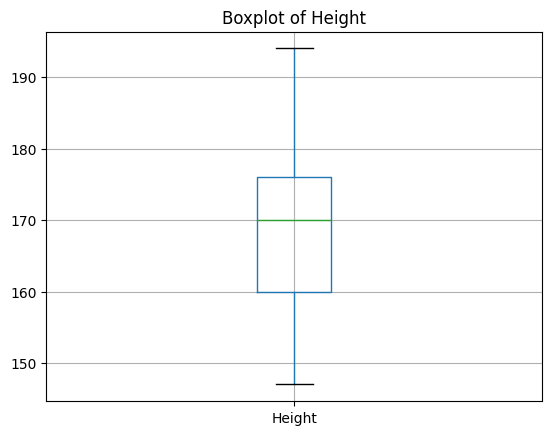

Weight: 4 outliers
      Weight
P276   120.0
P175   114.0
P136   117.0
P137   122.0


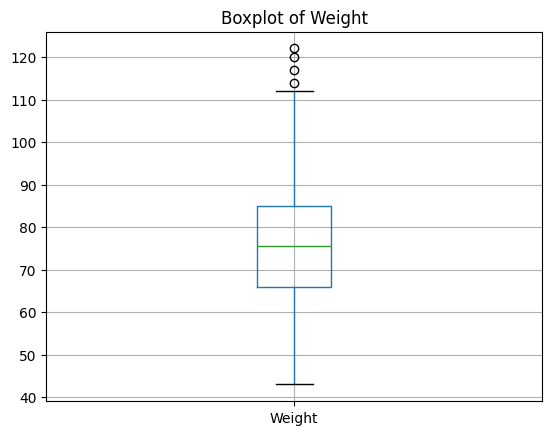

BMI: 4 outliers
            BMI
P198  38.754325
P223  39.600000
P136  38.204082
P137  38.941556


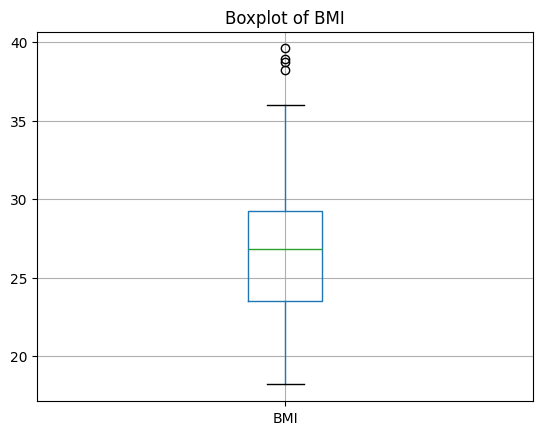

In [25]:
# Detectar outliers en Height, Weight y BMI usando el método IQR
import matplotlib.pyplot as plt

cols = ['Height', 'Weight', 'BMI']
for col in cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers")
        print(outliers[[col]])
        # Opcional: visualizar con boxplot
        plt.figure()
        data.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

As we don't have outliers in height, we will use the mean to calculate the missing values. On the contrary, as we have outliers in weight and BMI, we will use the median.

In [26]:
mean_height = data['Height'].mean()
median_height= data['Height'].median()
print('mean height', mean_height)
print('median height', median_height)

mean height 169.21019108280254
median height 170.0


Just to check, we calculated the mean and the median of the height to make sure they weren't that different, and as expected, they are very simmilar. We can confirm it's safe to use the mean.

In [27]:
# Lista de columnas numéricas que deben usar la mediana
numeric_cols = ['Height', 'Weight', 'BMI']

for col in numeric_cols:
    if col in data.columns:
        median = data[col].median()
        data[col].fillna(median, inplace=True)
# Reemplazar NaNs por la moda de cada columna
for column in data.columns:
    if data[column].isnull().any():  # Solo si hay NaNs en la columna
        mode = data[column].mode(dropna=True)
        if not mode.empty:
            data[column].fillna(mode[0], inplace=True)




display(data)



C:\Users\sergi\AppData\Local\Temp\ipykernel_54584\2241033221.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median, inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_54584\2241033221.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

Sex  HTA   Age PVC_transition      SOO_chamber  Height  Weight  \
P245  1.0  0.0  52.0             V3             RVOT   169.0    68.0   
P292  1.0  0.0  69.0             V3             LVOT   156.0    70.0   
P205  1.0  0.0  66.0             V4  Right ventricle   176.0    63.0   
P066  1.0  1.0  46.0             V3             RVOT   160.0    79.0   
P172  1.0  0.0  49.0             V3  Right ventricle   170.0    75.5   
...   ...  ...   ...            ...              ...     ...     ...   
P018  0.0  1.0  61.0             V1  Right ventricle   188.0    90.0   
P124  0.0  1.0  52.0             V3             LVOT   182.0    83.0   
P171  0.0  0.0  77.0             V6  Right ventricle   170.0    75.5   
P219  0.0  1.0  88.0             V1   Mitral annulus   166.0    90.0   
P230  1.0  0.0  32.0             V1             LVOT   175.0    73.0   

            BMI   DM  DLP  Smoker  COPD  Sleep_apnea  CLINICAL_SCORE  \
P245  23.800000  0.0  0.0     0.0   0.0          0.0             1.0   
P292  28.800000  0.0  1.0     0.0   0.0          0.0             1.0   
P205  20.338326  0.0  0.0     0.0   0.0          0.0             1.0   
P066  30.859375  0.0  0.0     0.0   0.0          0.0             1.0   
P172  26.800000  0.0  0.0     0.0   0.0          0.0             0.0   
...         ...  ...  ...     ...   ...          ...             ...   
P018  25.464011  0.0  0.0     0.0   0.0          0.0             3.0   
P124  25.057360  0.0  0.0     0.0   0.0          0.0             3.0   
P171  26.800000  0.0  0.0     0.0   0.0          0.0             2.0   
P219  32.700000  1.0  1.0     0.0   0.0          0.0             3.0   
P230  23.800000  0.0  0.0     0.0   0.0          0.0             0.0   

                              SOO  OTorigin  
P245         Pared libre anterior       1.0  
P292                          RCC       1.0  
P205     M. papilar posteromedial       0.0  
P066                  RVOT septal       1.0  
P172          Fascicular anterior       0.0  
...                           ...       ...  
P018                    LV summit       0.0  
P124       Seno de Valsalva dcho.       1.0  
P171               LV inferobasal       0.0  
P219  Anillo mitral anterolateral       0.0  
P230           Left coronary cusp       1.0  

[183 rows x 16 columns]

Once we have all the demographic data processed, we need the Y (classification of the arrythmia). We will use the document labels_frontiers... to do this step. We will add a column that will be our Y.

In [34]:
import openpyxl
# Load and print the Excel file
labels = pd.read_excel('../labels_FontiersUnsupervised.xlsx')

labels = pd.DataFrame(labels)
display(labels.head())

SOO SOO_Chamber      Automatic_SOO  \
0  LVOT cúspide derecha (cerca de la comisura)        LVOT                RCC   
1             RVOT supravalvular anterolateral        RVOT      RVOT Anterior   
2                                RVOT anterior        RVOT      RVOT Anterior   
3                           RVOT posteroseptal        RVOT  RVOT LateroSeptal   
4        LVOT intersenos de Valsalva dcho-izdo        LVOT         Intersinus   

  Region_Simplified  
0               RCC  
1      RVOTFREEWALL  
2      RVOTFREEWALL  
3        RVOTSEPTUM  
4        COMMISSURE

In [32]:
# Limpieza de columnas y valores
data.columns = data.columns.str.strip()
labels.columns = labels.columns.str.strip()
data['SOO'] = data['SOO'].astype(str).str.strip()
labels['SOO'] = labels['SOO'].astype(str).str.strip()
labels['SOO_Chamber'] = labels['SOO_Chamber'].astype(str).str.strip()

# 1. Crea una columna booleana 'is_OTorigin_0' que sea True donde OTorigin == 0
data['is_OTorigin_0'] = data['OTorigin'] == 0

# 2. Crea un diccionario de mapeo SOO -> SOO_Chamber desde labels
soo_to_chamber = labels.set_index('SOO')['SOO_Chamber'].to_dict()

# 3. Solo para los que OTorigin == 0, sustituye el valor en SOO_chamber si hay coincidencia en labels
mask = data['is_OTorigin_0']
data.loc[mask, 'SOO_chamber'] = data.loc[mask, 'SOO'].map(soo_to_chamber)

display(data.head())

Sex  HTA   Age PVC_transition SOO_chamber  Height  Weight        BMI  \
P245  1.0  0.0  52.0             V3        RVOT   169.0    68.0  23.800000   
P292  1.0  0.0  69.0             V3        LVOT   156.0    70.0  28.800000   
P205  1.0  0.0  66.0             V4        RVOT   176.0    63.0  20.338326   
P066  1.0  1.0  46.0             V3        RVOT   160.0    79.0  30.859375   
P172  1.0  0.0  49.0             V3         NaN   170.0    75.5  26.800000   

       DM  DLP  Smoker  COPD  Sleep_apnea  CLINICAL_SCORE  \
P245  0.0  0.0     0.0   0.0          0.0             1.0   
P292  0.0  1.0     0.0   0.0          0.0             1.0   
P205  0.0  0.0     0.0   0.0          0.0             1.0   
P066  0.0  0.0     0.0   0.0          0.0             1.0   
P172  0.0  0.0     0.0   0.0          0.0             0.0   

                           SOO  OTorigin  is_OTorigin_0  
P245      Pared libre anterior       1.0          False  
P292                       RCC       1.0          False  
P205  M. papilar posteromedial       0.0           True  
P066               RVOT septal       1.0          False  
P172       Fascicular anterior       0.0           True

In [31]:
# Limpieza de columnas y valores
data.columns = data.columns.str.strip()
labels.columns = labels.columns.str.strip()
data['SOO'] = data['SOO'].astype(str).str.strip()
labels['SOO'] = labels['SOO'].astype(str).str.strip()
labels['SOO_Chamber'] = labels['SOO_Chamber'].astype(str).str.strip()

# 1. Marca los que tienen OTorigin == 0
mask = data['OTorigin'] == 0

# 2. Para cada fila con OTorigin == 0, busca el valor correspondiente en labels
for idx in data[mask].index:
    soo_value = data.at[idx, 'SOO']
    match = labels[labels['SOO'] == soo_value]
    if not match.empty:
        data.at[idx, 'SOO_chamber'] = match.iloc[0]['SOO_Chamber']
    else:
        print(f"No match for SOO='{soo_value}' in labels for patient {idx}")

display(data.head())

No match for SOO='Fascicular anterior' in labels for patient P172
No match for SOO='Inferoseptal basal' in labels for patient P253
No match for SOO='Ostium del SC (crux cordis)' in labels for patient P133
No match for SOO='Fascicular posterior' in labels for patient P207
No match for SOO='CS distal (summit)' in labels for patient P254
No match for SOO='LV summit EPI (SC)' in labels for patient P197
No match for SOO='Unión mitroaórtica' in labels for patient P022
No match for SOO='Banda moderadora' in labels for patient P216
No match for SOO='Unión mitroaórtica' in labels for patient P202
No match for SOO='Papilar inferolateral' in labels for patient P239
No match for SOO='Anillo mitral posterior' in labels for patient P210
No match for SOO='Unión mitroaórtica' in labels for patient P225
No match for SOO='LV perihisiana' in labels for patient P145
No match for SOO='Left coronary cusp, desde el ventriculo izquierdo' in labels for patient P251
No match for SOO='Crux cordis (SC)' in labels

Sex  HTA   Age PVC_transition SOO_chamber  Height  Weight        BMI  \
P245  1.0  0.0  52.0             V3        RVOT   169.0    68.0  23.800000   
P292  1.0  0.0  69.0             V3        LVOT   156.0    70.0  28.800000   
P205  1.0  0.0  66.0             V4        RVOT   176.0    63.0  20.338326   
P066  1.0  1.0  46.0             V3        RVOT   160.0    79.0  30.859375   
P172  1.0  0.0  49.0             V3         NaN   170.0    75.5  26.800000   

       DM  DLP  Smoker  COPD  Sleep_apnea  CLINICAL_SCORE  \
P245  0.0  0.0     0.0   0.0          0.0             1.0   
P292  0.0  1.0     0.0   0.0          0.0             1.0   
P205  0.0  0.0     0.0   0.0          0.0             1.0   
P066  0.0  0.0     0.0   0.0          0.0             1.0   
P172  0.0  0.0     0.0   0.0          0.0             0.0   

                           SOO  OTorigin  is_OTorigin_0  
P245      Pared libre anterior       1.0          False  
P292                       RCC       1.0          False  
P205  M. papilar posteromedial       0.0           True  
P066               RVOT septal       1.0          False  
P172       Fascicular anterior       0.0           True